In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **Data Pre-Processing**

### 3.1 Data Inspection and Summary Statistics

In [2]:
df=pd.read_csv("C:/Users/bikki/Downloads/Diabetes.csv")
df.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Outcome
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES


In [3]:
df.describe()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years)
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [4]:
df = df.rename(columns={
    ' Number of times pregnant': 'Pregnancies',
    ' Plasma glucose concentration': 'Glucose',
    ' Diastolic blood pressure': 'Blood_Pressure',
    ' Triceps skin fold thickness': 'Skin_Thickness',
    ' 2-Hour serum insulin': 'Insulin',
    ' Body mass index': 'BMI',
    ' Diabetes pedigree function': 'Diabetes_Pedigree_Function',
    ' Age (years)': 'Age'
})

In [5]:
df.head(0)

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome


### 3.2 Data Cleaning and Feature Engineering

In [6]:
df.isnull().sum()

Pregnancies                   0
Glucose                       0
Blood_Pressure                0
Skin_Thickness                0
Insulin                       0
BMI                           0
Diabetes_Pedigree_Function    0
Age                           0
Outcome                       0
dtype: int64

In [7]:
print(df.duplicated().sum())

0


In [8]:
df['Outcome']=df['Outcome'].astype('category')
df['Outcome']=df['Outcome'].cat.codes

### 3.3 Outlier Treatment

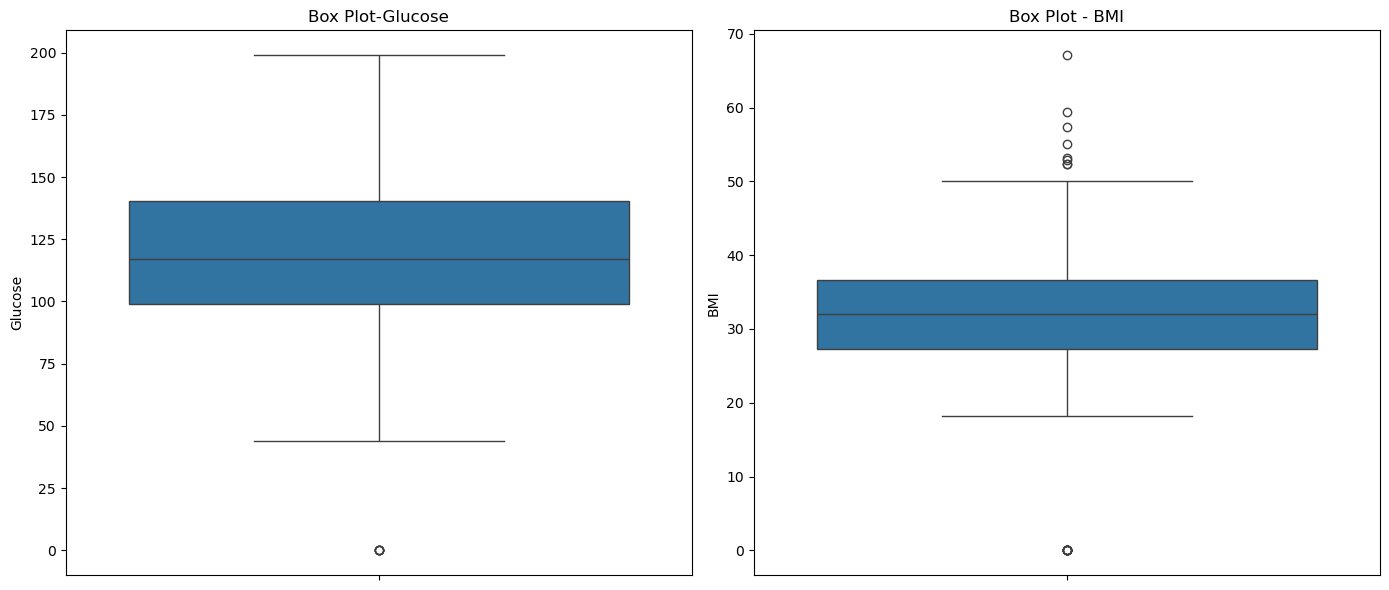

In [9]:
plt.figure(figsize=(14, 6))

# Boxplot for Plasma Glucose Concentration
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Glucose'])
plt.title('Box Plot-Glucose')

# Boxplot for Body Mass Index
plt.subplot(1, 2, 2)
sns.boxplot(y=df['BMI'])
plt.title('Box Plot - BMI')
plt.tight_layout()
plt.show()

In [10]:
from scipy.stats import zscore

# Calculate Z-scores for Glucose and BMI
df['Glucose_Z'] = zscore(df['Glucose'])
df['BMI_Z'] = zscore(df['BMI'])
df['Skin_Thickness_Z'] = zscore(df['Skin_Thickness'])
df['Blood_Pressure_Z'] = zscore(df['Blood_Pressure'])
df['Diabetes_Pedigree_Function_Z'] = zscore(df['Diabetes_Pedigree_Function'])
df['Insulin_Z'] = zscore(df['Insulin'])

# Filter rows where Z-score is beyond ±3 (common threshold for outliers)
glucose_outliers = df[(df['Glucose_Z'].abs() > 3)]
bmi_outliers = df[(df['BMI_Z'].abs() > 3)]
skin_thickness = df[(df['Skin_Thickness_Z'].abs() > 3)]
blood_pressure = df[(df['Blood_Pressure_Z'].abs() > 3)]
diabetes_pedigree_function= df[(df['Diabetes_Pedigree_Function_Z'].abs() > 3)]
insulin = df[(df['Insulin_Z'].abs() > 3)]

print("Outliers in Glucose:", glucose_outliers.shape[0])
print("Outliers in BMI:", bmi_outliers.shape[0])
print("Outliers in Skin_Thickness:", skin_thickness.shape[0])
print("Outliers in Blood_Pressure:",blood_pressure.shape[0])
print("Outliers in Diabetes_Pedigree_Function:", diabetes_pedigree_function.shape[0])
print("Outliers in Insulin_Z:", insulin.shape[0])

Outliers in Glucose: 5
Outliers in BMI: 14
Outliers in Skin_Thickness: 1
Outliers in Blood_Pressure: 35
Outliers in Diabetes_Pedigree_Function: 11
Outliers in Insulin_Z: 18


Processing column: Glucose


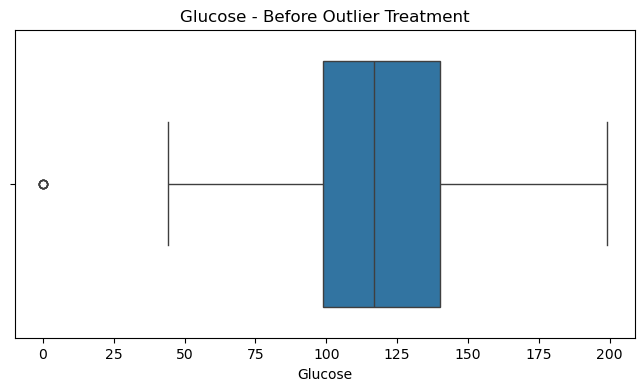

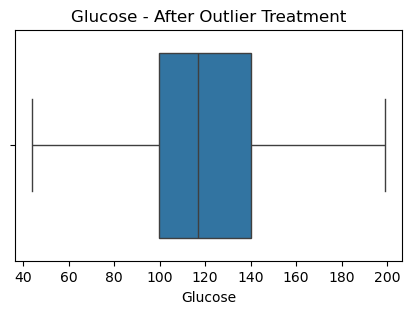

Processing column: Skin_Thickness


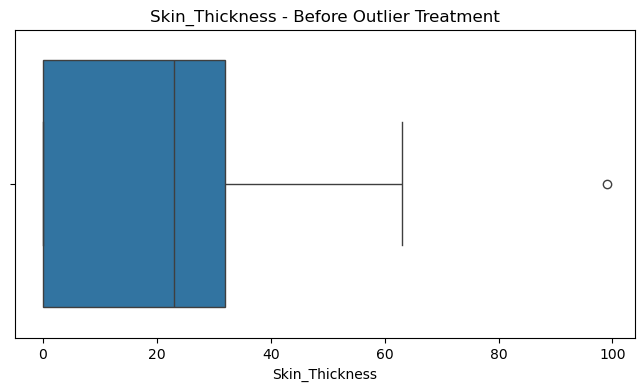

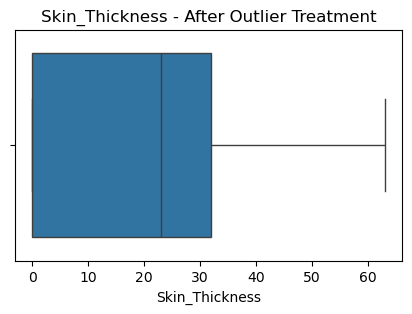

Processing column: Blood_Pressure


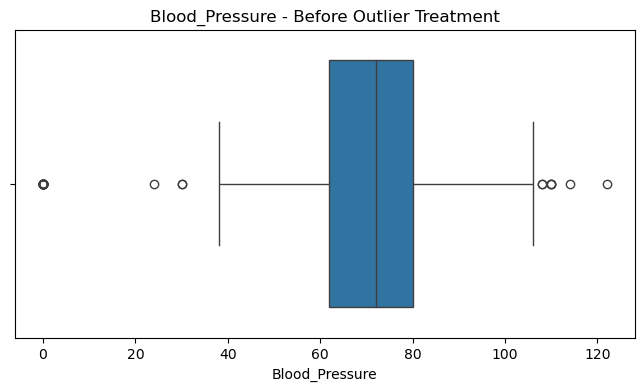

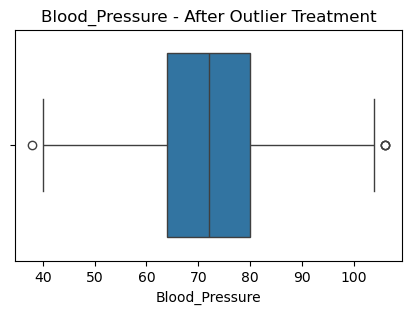

Processing column: Insulin


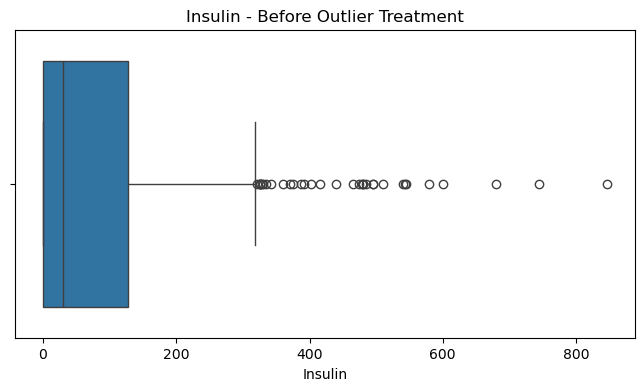

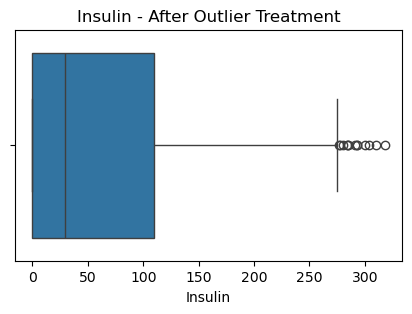

Processing column: BMI


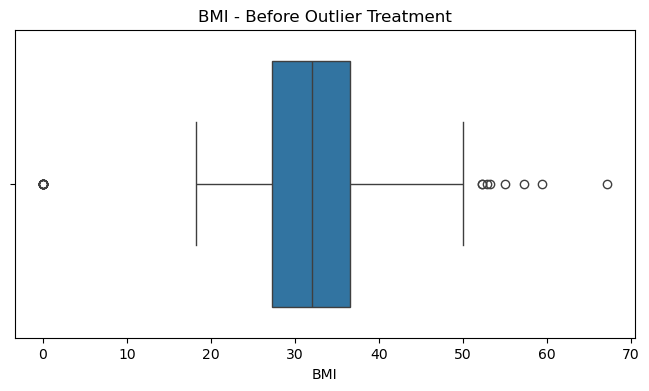

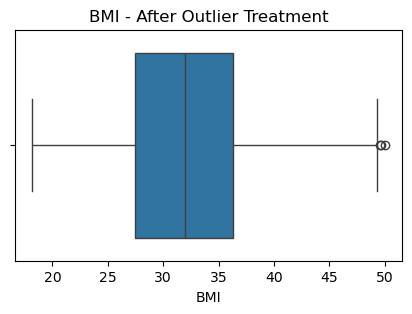

Processing column: Diabetes_Pedigree_Function


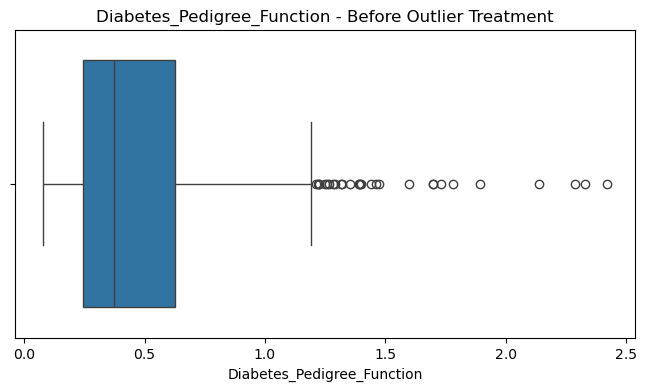

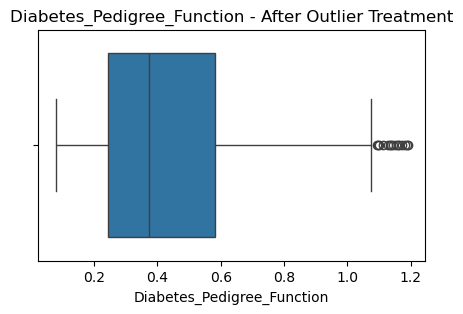

In [11]:
# Function for outlier detection and treatment
def outlier_treatment(df):
    # Specified columns for outlier treatment
    specified_columns = ["Glucose", "Skin_Thickness", "Blood_Pressure", "Insulin", "BMI", "Diabetes_Pedigree_Function"]
    
    for column in specified_columns:
        print(f"Processing column: {column}")
        
        # Box plot before treatment
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[column])
        plt.title(f"{column} - Before Outlier Treatment")
        plt.show()
        
        # Calculate IQR, lower and upper bounds
        Q1 = df[column].quantile(0.25)  
        Q3 = df[column].quantile(0.75)  
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Replace outliers with the median
        median_value = df[column].median()
        df[column] = df[column].apply(
            lambda x: median_value if x < lower_bound or x > upper_bound else x
        )
        
        # Box plot after treatment
        plt.figure(figsize=(5, 3))
        sns.boxplot(x=df[column])
        plt.title(f"{column} - After Outlier Treatment")
        plt.show()
    
    return df
df_cleaned = outlier_treatment(df)

## **4. Exploratory Data Analysis (EDA)**


### 4.1 Summary Statistics

In [12]:
df.describe()

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome,Glucose_Z,BMI_Z,Skin_Thickness_Z,Blood_Pressure_Z,Diabetes_Pedigree_Function_Z,Insulin_Z
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,3.845052,121.656250,72.196615,20.437500,60.919271,32.198958,0.427667,33.240885,0.348958,-9.251859e-18,2.590520e-16,1.006140e-16,1.503427e-17,2.451743e-16,-3.006854e-17
std,3.369578,30.438286,11.146723,15.698554,77.635666,6.410558,0.245162,11.760232,0.476951,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,0.000000,44.000000,38.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000,-3.783654e+00,-4.060474e+00,-1.288212e+00,-3.572597e+00,-1.189553e+00,-6.928906e-01
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.500000,0.243750,24.000000,0.000000,-6.852363e-01,-5.955785e-01,-1.288212e+00,-3.673367e-01,-6.889685e-01,-6.928906e-01
50%,3.000000,117.000000,72.000000,23.000000,29.750000,32.000000,0.371750,29.000000,0.000000,-1.218877e-01,9.419788e-04,1.545332e-01,1.496408e-01,-3.001282e-01,-4.280622e-01
75%,6.000000,140.250000,80.000000,32.000000,110.000000,36.300000,0.582250,41.000000,1.000000,6.057709e-01,5.847705e-01,7.190857e-01,5.632228e-01,4.662269e-01,4.120079e-01
max,17.000000,199.000000,106.000000,63.000000,318.000000,50.000000,1.191000,81.000000,1.000000,2.444478e+00,4.455807e+00,4.921866e+00,2.734528e+00,5.883565e+00,6.652839e+00


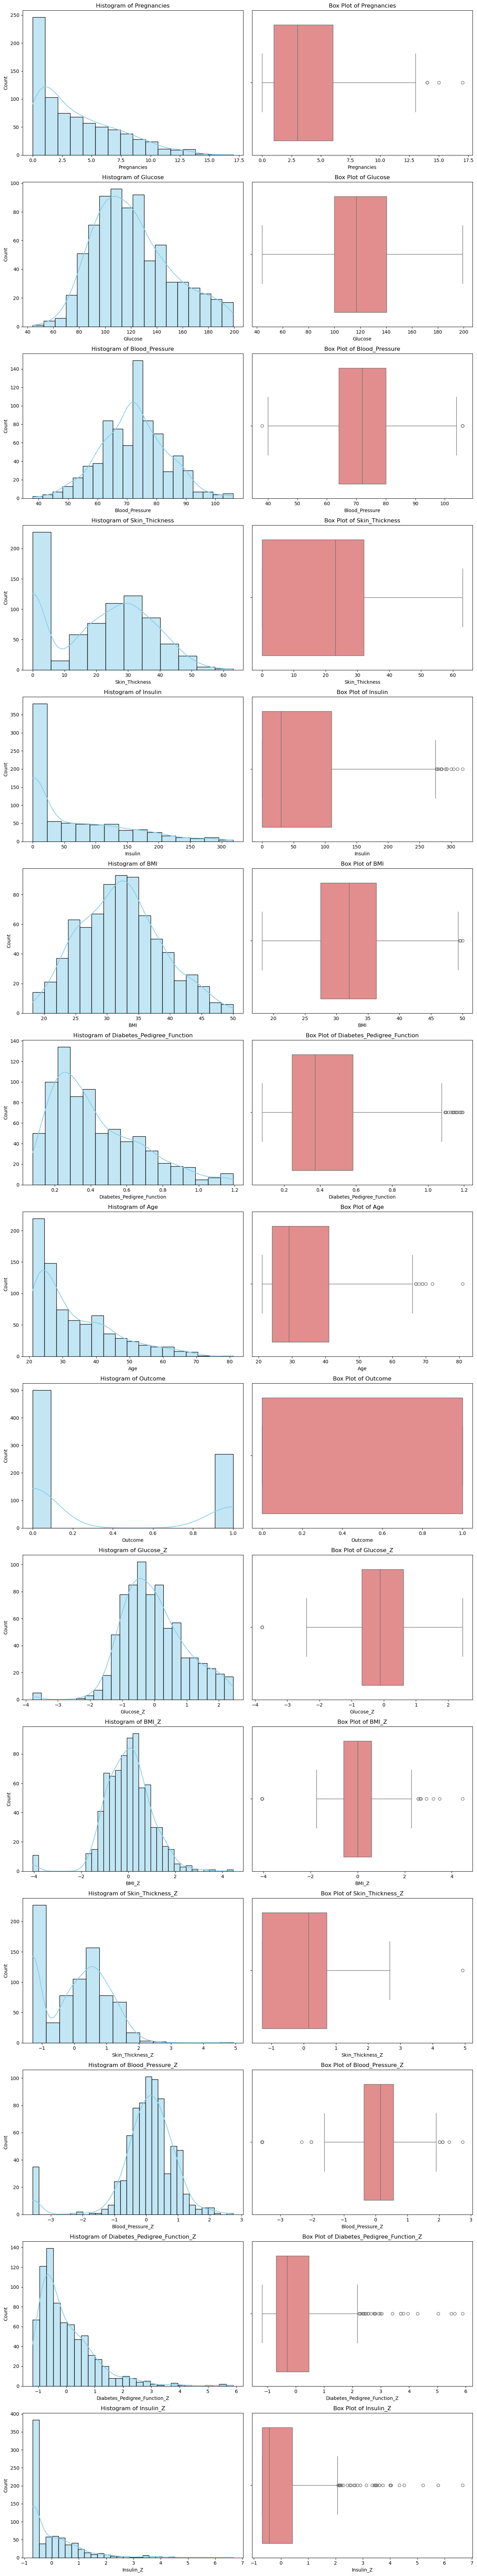

In [13]:
# Select numeric columns
numeric_df = df.select_dtypes(include='number')

# Set up the figure size
num_cols = numeric_df.shape[1]
fig, axes = plt.subplots(nrows=num_cols, ncols=2, figsize=(14, 5 * num_cols))

# Loop through numeric features to plot histogram and boxplot
for i, column in enumerate(numeric_df.columns):
    # Histogram
    sns.histplot(numeric_df[column], kde=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'Histogram of {column}')
    
    # Boxplot
    sns.boxplot(x=numeric_df[column], ax=axes[i, 1], color='lightcoral')
    axes[i, 1].set_title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

C:\Users\bikki\AppData\Local\Temp\ipykernel_8116\881149734.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Outcome',palette='Set2')


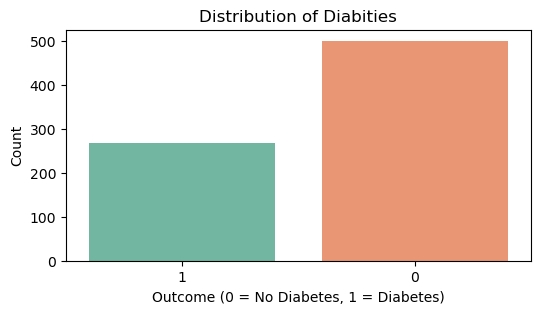

In [20]:
plt.figure(figsize=(6,3))
sns.countplot(data=df,x='Outcome',palette='Set2')
plt.title('Distribution of Diabities')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Count')
plt.show()

### 4.3 Bivariate Analysis

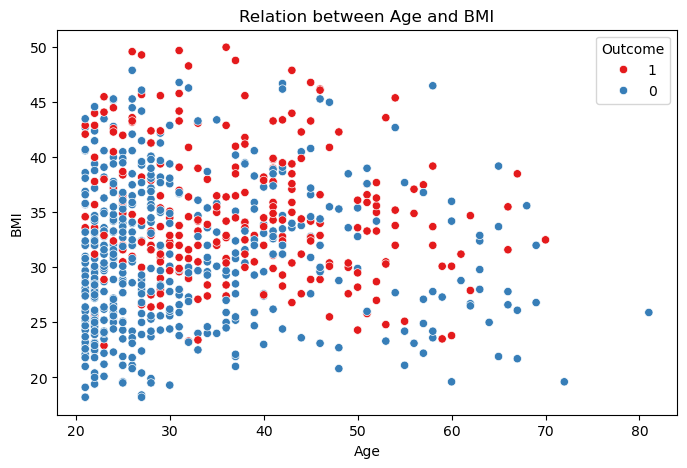

In [21]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df,x='Age',y='BMI',hue='Outcome',palette='Set1')
plt.title('Relation between Age and BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

In [ ]:
numeric_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(16, 4 * len(numeric_cols)))
for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols), 1, i + 1)
    sns.boxplot(data=df, x='Outcome', y=col, palette='pastel')
    plt.title(f'{col} vs Outcome')
    plt.xlabel('Diabetes Outcome (0 = No, 1 = Yes)')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

C:\Users\bikki\AppData\Local\Temp\ipykernel_8116\1057067608.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Outcome', y=col, palette='pastel')
C:\Users\bikki\AppData\Local\Temp\ipykernel_8116\1057067608.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Outcome', y=col, palette='pastel')
C:\Users\bikki\AppData\Local\Temp\ipykernel_8116\1057067608.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Outcome', y=col, palette='pastel')
C:\Users\bikki\AppData\Local\Temp\ipykernel_8116\1057067608.py:6: Futu

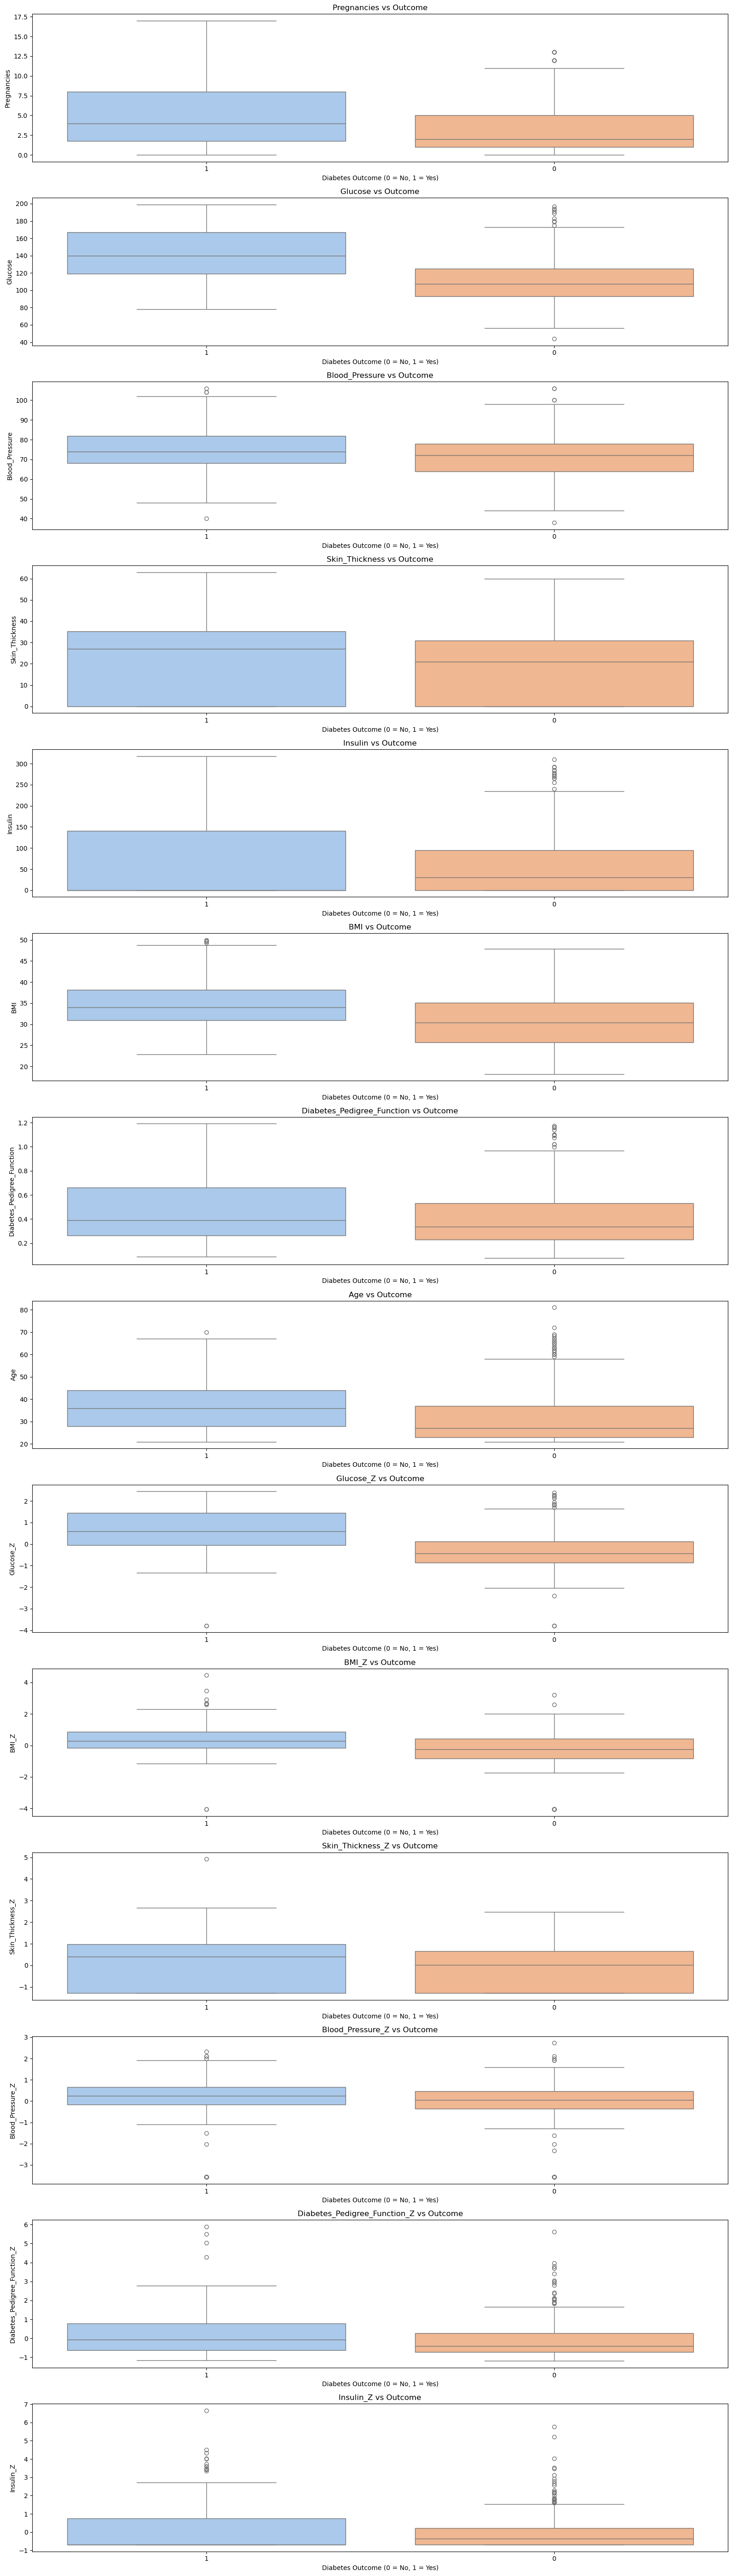

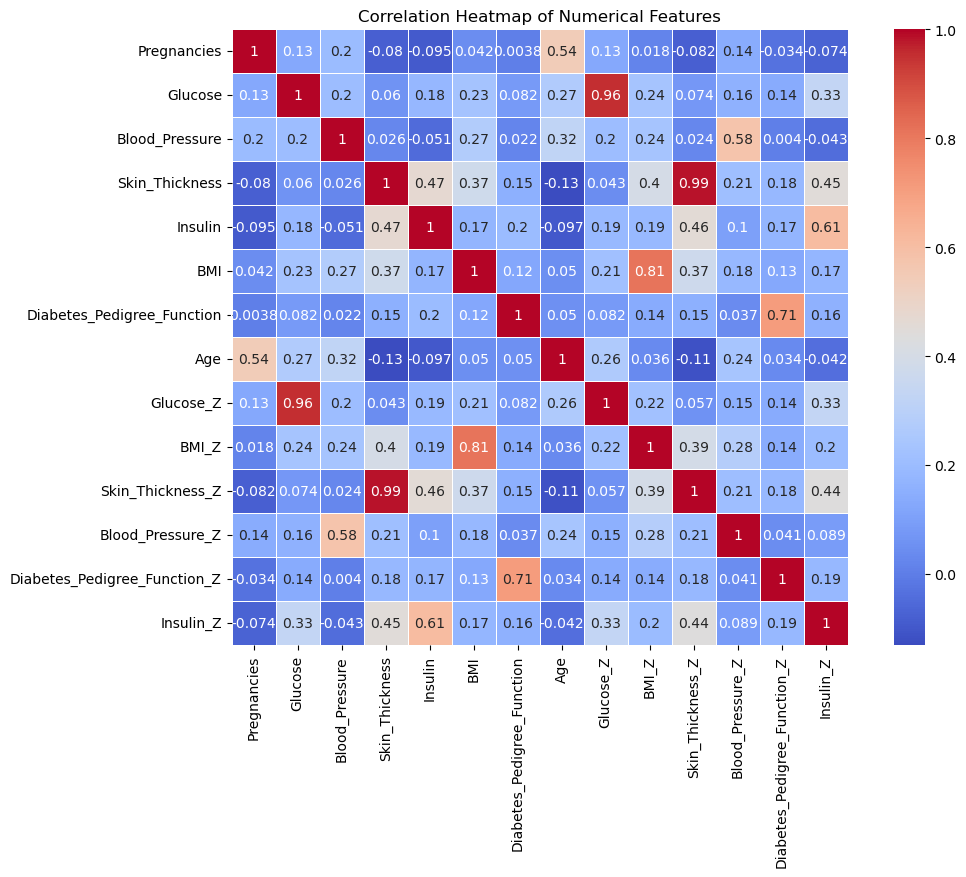

In [25]:
corr_matrix=df.select_dtypes(include='number').corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',square=True, linewidth=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [45]:
x=df.drop(columns='Outcome',axis=1)
x.head()

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Glucose_Z,BMI_Z,Skin_Thickness_Z,Blood_Pressure_Z,Diabetes_Pedigree_Function_Z,Insulin_Z
0,6,148.0,72.0,35.0,0.0,33.6,0.6270,50,0.848324,0.204013,0.907270,0.149641,0.468492,-0.692891
1,1,85.0,66.0,29.0,0.0,26.6,0.3510,31,-1.123396,-0.684422,0.530902,-0.160546,-0.365061,-0.692891
2,8,183.0,64.0,0.0,0.0,23.3,0.6720,32,1.943724,-1.103255,-1.288212,-0.263941,0.604397,-0.692891
3,1,89.0,66.0,23.0,94.0,28.1,0.1670,21,-0.998208,-0.494043,0.154533,-0.160546,-0.920763,0.123302
4,0,137.0,40.0,35.0,168.0,43.1,0.3725,33,0.504055,1.409746,0.907270,-1.504687,5.484909,0.765836


In [44]:
y=df['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: object

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=10)

In [37]:
len(x_train)

537

In [38]:
len(y_test)

231

In [40]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=45)
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=45)

In [41]:
y_train_pred=model.predict(x_train)
y_train_pred[:5]

array(['0', '0', '1', '0', '0'], dtype=object)

In [42]:
y_train[:5]

491    0
69     0
667    1
566    0
97     0
Name: Outcome, dtype: object

In [43]:
from sklearn import metrics
print('Accuracy',metrics.accuracy_score(y_train,y_train_pred))

Accuracy 1.0
